### Outline：

這次總共訓練了4個神經網路：

第一個神經網路用最原始loss function使用mse，激活函數使用sigmoid

第二個神經網路loss function換成適合多分類問題的cross entropy

第三個神經網路除了loss function換成適合多分類問題的cross entropy外，將激活函數換成鼎鼎大名的relu

第四個神經網路為了防止overfitting的問題，加入了Dropout跟early stopping

In [1]:
import numpy as np #方便各種數字、矩陣計算

import matplotlib.pyplot as plt #方便繪圖(點圖、直方圖...等)
%matplotlib inline

import pandas as pd #方便資料分析(資料表格化、合併...等)

In [2]:
import os
import tensorflow as tf
import keras
from keras.backend import set_session

def create_session(gpu_id='0', pp_mem_frac=None):

    tf.reset_default_graph()
    os.environ["CUDA_VISIBLE_DEVICES"] = gpu_id # can multiple?
    with tf.device('/gpu:' + gpu_id):
        config = tf.ConfigProto()
        config.gpu_options.allow_growth = True
        if pp_mem_frac is not None:
            config.gpu_options.per_process_gpu_memory_fraction=pp_mem_frac
        session = tf.Session(config = config)
    return session
gpu_id = '0'
sess = create_session(gpu_id)
set_session(sess)
print("GPU Finished..............................")

Using TensorFlow backend.


GPU Finished..............................


In [3]:
import keras

### 從keras讀入mnist

In [4]:
from keras.datasets import mnist

In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [6]:
y = pd.DataFrame(y_train)
y[y_train == 1].index

Int64Index([    3,     6,     8,    14,    23,    24,    40,    59,    67,
               70,
            ...
            59902, 59912, 59919, 59932, 59954, 59958, 59965, 59979, 59984,
            59994],
           dtype='int64', length=6742)

### 輸入、輸出資料整理

In [7]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

### 輸出做one-hot encoding

In [8]:
from keras.utils import np_utils

In [9]:
y_train = np_utils.to_categorical(y_train ,10)
y_test = np_utils.to_categorical(y_test, 10)

In [10]:
y_train[42]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

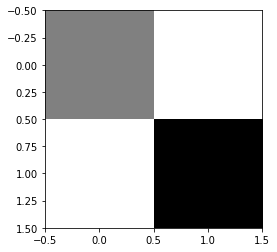

In [11]:
plt.imshow([[127, 0],[0, 255]],cmap='binary')

In [12]:
x_train[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

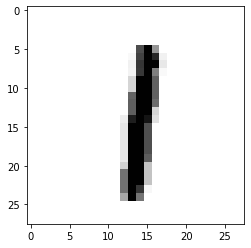

In [13]:
plt.imshow(x_train[40].reshape(28,28),cmap='binary')

# 打造神經網路

1層隱藏層

第一層500個神經元

隱藏層Activation function用sigmoid

輸出層Activation function用softmax(softmax適合多分類問題，將神經元輸出壓縮到0~1之間)

In [14]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam

In [15]:
model = Sequential()

In [16]:
model.add(Dense(100,input_dim = 784))
model.add(Activation('sigmoid'))

In [17]:
model.add(Dense(500))
model.add(Activation('sigmoid'))

In [18]:
model.add(Dense(10))
model.add(Activation('softmax'))

### 組裝神經網路

In [19]:
model.compile(loss='mse', optimizer=SGD(lr=0.5),
              metrics=['accuracy'])

### 檢視神經網路

In [20]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               78500     
_________________________________________________________________
activation_1 (Activation)    (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 500)               50500     
_________________________________________________________________
activation_2 (Activation)    (None, 500)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5010      
_________________________________________________________________
activation_3 (Activation)    (None, 10)                0         
Total params: 134,010
Trainable params: 134,010
Non-trainable params: 0
_________________________________________________________________


# 訓練神經網路

In [21]:
history = model.fit(x_train, y_train, batch_size=100, epochs=50, validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/50
54000/54000 [==============================] - 2s 40us/step - loss: 0.0775 - acc: 0.4001 - val_loss: 0.0603 - val_acc: 0.6218
Epoch 2/50
54000/54000 [==============================] - 1s 23us/step - loss: 0.0447 - acc: 0.7390 - val_loss: 0.0286 - val_acc: 0.8835
Epoch 3/50
54000/54000 [==============================] - 1s 24us/step - loss: 0.0250 - acc: 0.8709 - val_loss: 0.0175 - val_acc: 0.9115
Epoch 4/50
54000/54000 [==============================] - 1s 24us/step - loss: 0.0185 - acc: 0.8954 - val_loss: 0.0139 - val_acc: 0.9197
Epoch 5/50
54000/54000 [==============================] - 1s 23us/step - loss: 0.0162 - acc: 0.9024 - val_loss: 0.0130 - val_acc: 0.9235
Epoch 6/50
54000/54000 [==============================] - 1s 23us/step - loss: 0.0151 - acc: 0.9093 - val_loss: 0.0122 - val_acc: 0.9245
Epoch 7/50
54000/54000 [==============================] - 1s 23us/step - loss: 0.0143 - acc: 0.9141 - val_loss: 0.0119 - val_acc:

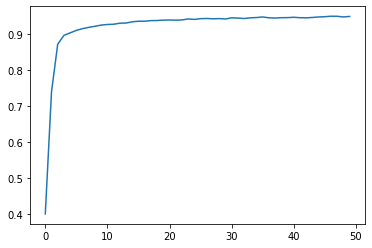

In [22]:
plt.plot(history.history['acc'])

In [24]:
from sklearn import metrics 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [24]:
#用classification_report可以看看每個數字的精確度(非準確率)

print("Train data：")
print(classification_report(y_train.argmax(1), model.predict(x_train).argmax(1)))
metrics.accuracy_score(y_train.argmax(1), model.predict(x_train).argmax(1))

Train data：
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      5923
           1       0.98      0.98      0.98      6742
           2       0.96      0.94      0.95      5958
           3       0.91      0.95      0.93      6131
           4       0.95      0.94      0.95      5842
           5       0.94      0.94      0.94      5421
           6       0.97      0.97      0.97      5918
           7       0.96      0.95      0.96      6265
           8       0.93      0.94      0.94      5851
           9       0.92      0.93      0.93      5949

    accuracy                           0.95     60000
   macro avg       0.95      0.95      0.95     60000
weighted avg       0.95      0.95      0.95     60000



0.9507166666666667

In [25]:
print("Test data：")
print(classification_report(y_test.argmax(1), model.predict(x_test).argmax(1)))
metrics.accuracy_score(y_test.argmax(1), model.predict(x_test).argmax(1))

Test data：
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       980
           1       0.98      0.98      0.98      1135
           2       0.96      0.95      0.95      1032
           3       0.92      0.95      0.93      1010
           4       0.95      0.93      0.94       982
           5       0.94      0.93      0.93       892
           6       0.97      0.96      0.96       958
           7       0.96      0.93      0.95      1028
           8       0.93      0.94      0.93       974
           9       0.91      0.93      0.92      1009

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000



0.9478

# 將loss function換成適合多分類問題的cross entropy

In [28]:
model2 = Sequential()

In [29]:
model2.add(Dense(100,input_dim = 784))
model2.add(Activation('sigmoid'))

In [30]:
model2.add(Dense(500))
model2.add(Activation('sigmoid'))

In [31]:
model2.add(Dense(10))
model2.add(Activation('softmax'))

In [32]:
model2.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.03),
               metrics=['accuracy'])

In [33]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 100)               78500     
_________________________________________________________________
activation_4 (Activation)    (None, 100)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 500)               50500     
_________________________________________________________________
activation_5 (Activation)    (None, 500)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                5010      
_________________________________________________________________
activation_6 (Activation)    (None, 10)                0         
Total params: 134,010
Trainable params: 134,010
Non-trainable params: 0
_________________________________________________________________


In [34]:
history2 = model2.fit(x_train, y_train, batch_size=100, epochs=50, validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/50
54000/54000 [==============================] - 2s 28us/step - loss: 1.4532 - acc: 0.6628 - val_loss: 0.7434 - val_acc: 0.8742
Epoch 2/50
54000/54000 [==============================] - 1s 24us/step - loss: 0.5921 - acc: 0.8663 - val_loss: 0.4103 - val_acc: 0.9092
Epoch 3/50
54000/54000 [==============================] - 1s 24us/step - loss: 0.4203 - acc: 0.8936 - val_loss: 0.3264 - val_acc: 0.9187
Epoch 4/50
54000/54000 [==============================] - 1s 24us/step - loss: 0.3601 - acc: 0.9029 - val_loss: 0.2830 - val_acc: 0.9243
Epoch 5/50
54000/54000 [==============================] - 1s 25us/step - loss: 0.3291 - acc: 0.9104 - val_loss: 0.2592 - val_acc: 0.9263
Epoch 6/50
54000/54000 [==============================] - 1s 28us/step - loss: 0.3074 - acc: 0.9151 - val_loss: 0.2530 - val_acc: 0.9355
Epoch 7/50
54000/54000 [==============================] - 1s 24us/step - loss: 0.2955 - acc: 0.9166 - val_loss: 0.2410 - val_acc:

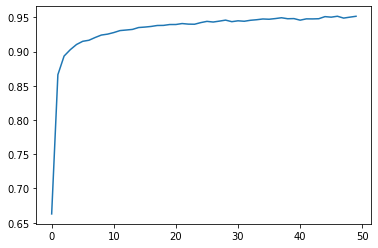

In [35]:
plt.plot(history2.history['acc'])

In [36]:
print("Test data：")
print(classification_report(y_test.argmax(1), model2.predict(x_test).argmax(1)))
metrics.accuracy_score(y_test.argmax(1), model2.predict(x_test).argmax(1))

Test data：
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       980
           1       0.99      0.98      0.98      1135
           2       0.96      0.95      0.95      1032
           3       0.93      0.94      0.94      1010
           4       0.93      0.96      0.94       982
           5       0.95      0.92      0.93       892
           6       0.96      0.95      0.95       958
           7       0.94      0.94      0.94      1028
           8       0.91      0.94      0.93       974
           9       0.94      0.91      0.92      1009

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000



0.9475

# 將優化器換成神經網路界鼎鼎大名的relu

In [100]:
model3 = Sequential()

In [101]:
model3.add(Dense(100,input_dim = 784))
model3.add(Activation('relu'))

In [102]:
model3.add(Dense(500))
model3.add(Activation('relu'))

In [103]:
model3.add(Dense(10))
model3.add(Activation('softmax'))

In [104]:
model3.compile(loss='categorical_crossentropy', 
              optimizer=Adam(lr=0.00003),
              metrics=['accuracy'])

In [105]:
model3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 100)               78500     
_________________________________________________________________
activation_22 (Activation)   (None, 100)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 500)               50500     
_________________________________________________________________
activation_23 (Activation)   (None, 500)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 10)                5010      
_________________________________________________________________
activation_24 (Activation)   (None, 10)                0         
Total params: 134,010
Trainable params: 134,010
Non-trainable params: 0
_________________________________________________________________


In [106]:
history3 = model3.fit(x_train, y_train, batch_size=100, epochs=50, validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/50
54000/54000 [==============================] - 2s 40us/step - loss: 8.9770 - acc: 0.4040 - val_loss: 6.2974 - val_acc: 0.5805
Epoch 2/50
54000/54000 [==============================] - 2s 35us/step - loss: 6.1553 - acc: 0.5905 - val_loss: 4.8182 - val_acc: 0.6623
Epoch 3/50
54000/54000 [==============================] - 2s 35us/step - loss: 4.6802 - acc: 0.6766 - val_loss: 3.7770 - val_acc: 0.7185
Epoch 4/50
54000/54000 [==============================] - 2s 35us/step - loss: 3.1602 - acc: 0.7676 - val_loss: 2.6821 - val_acc: 0.8038
Epoch 5/50
54000/54000 [==============================] - 2s 35us/step - loss: 2.7969 - acc: 0.7981 - val_loss: 2.4938 - val_acc: 0.8193
Epoch 6/50
54000/54000 [==============================] - 2s 35us/step - loss: 2.6444 - acc: 0.8109 - val_loss: 2.3960 - val_acc: 0.8272
Epoch 7/50
54000/54000 [==============================] - 2s 35us/step - loss: 2.5374 - acc: 0.8209 - val_loss: 2.3201 - val_acc:

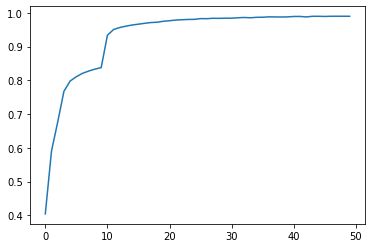

In [107]:
plt.plot(history3.history['acc'])

In [36]:
metrics.accuracy_score(y_test.argmax(1), model3.predict(x_test).argmax(1))

0.9542

In [108]:
print("Test data：")
print(classification_report(y_test.argmax(1), model3.predict(x_test).argmax(1)))
metrics.accuracy_score(y_test.argmax(1), model3.predict(x_test).argmax(1))

Test data：
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       980
           1       0.98      0.99      0.98      1135
           2       0.97      0.94      0.96      1032
           3       0.93      0.95      0.94      1010
           4       0.95      0.97      0.96       982
           5       0.94      0.93      0.94       892
           6       0.97      0.97      0.97       958
           7       0.95      0.95      0.95      1028
           8       0.94      0.93      0.94       974
           9       0.94      0.93      0.94      1009

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000



0.9542

# 神經網路可能會有overfitting的問題，加入dropout來防止

In [109]:
from keras.layers import Dropout

In [110]:
model4 = Sequential()

In [111]:
model4.add(Dense(100,input_dim = 784))
model4.add(Activation('relu'))

In [112]:
model4.add(Dense(500))
model4.add(Activation('relu'))

In [113]:
model4.add(Dropout(0.2))

In [114]:
model4.add(Dense(10))
model4.add(Activation('softmax'))

In [115]:
model4.compile(loss='categorical_crossentropy', 
               optimizer=Adam(lr=0.00003),
               metrics=['accuracy'])

In [116]:
model4.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 100)               78500     
_________________________________________________________________
activation_25 (Activation)   (None, 100)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 500)               50500     
_________________________________________________________________
activation_26 (Activation)   (None, 500)               0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 10)                5010      
_________________________________________________________________
activation_27 (Activation)   (None, 10)                0         
Total para

In [117]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=2)

In [118]:
history4 = model4.fit(x_train, y_train, batch_size=100, epochs=50, validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/50
54000/54000 [==============================] - 2s 44us/step - loss: 8.2585 - acc: 0.4346 - val_loss: 3.9078 - val_acc: 0.7232
Epoch 2/50
54000/54000 [==============================] - 2s 37us/step - loss: 4.2953 - acc: 0.6950 - val_loss: 2.0064 - val_acc: 0.8477
Epoch 3/50
54000/54000 [==============================] - 2s 36us/step - loss: 2.6512 - acc: 0.8007 - val_loss: 1.4245 - val_acc: 0.8915
Epoch 4/50
54000/54000 [==============================] - 2s 36us/step - loss: 2.1077 - acc: 0.8412 - val_loss: 1.2005 - val_acc: 0.9070
Epoch 5/50
54000/54000 [==============================] - 2s 37us/step - loss: 1.8245 - acc: 0.8628 - val_loss: 1.0800 - val_acc: 0.9177
Epoch 6/50
54000/54000 [==============================] - 2s 37us/step - loss: 1.6125 - acc: 0.8763 - val_loss: 0.9936 - val_acc: 0.9237
Epoch 7/50
54000/54000 [==============================] - 2s 37us/step - loss: 1.4795 - acc: 0.8878 - val_loss: 0.9089 - val_acc:

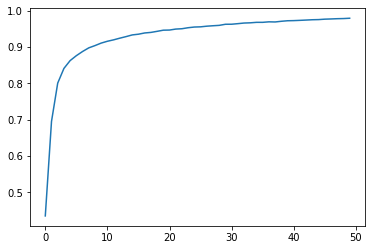

In [119]:
plt.plot(history4.history['acc'])

### 雖然train data時的表現看似變差了，但對validation跟test data的效果較好

In [120]:
print("Test data：")
print(classification_report(y_test.argmax(1), model4.predict(x_test).argmax(1)))
metrics.accuracy_score(y_test.argmax(1), model4.predict(x_test).argmax(1))

Test data：
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.96      0.97      1032
           3       0.96      0.96      0.96      1010
           4       0.96      0.97      0.97       982
           5       0.97      0.96      0.96       892
           6       0.97      0.97      0.97       958
           7       0.98      0.95      0.96      1028
           8       0.95      0.95      0.95       974
           9       0.95      0.95      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



0.9662

In [33]:
#confusion_matrix可以看出每個預測錯誤的是預測成哪一個
row = ["true_0","true_1","true_2","true_3","true_4",
       "true_5","true_6","true_7","true_8","true_9"]

column = ["predict_0","predict_1","predict_2","predict_3","predict_4",
          "predict_5","predict_6","predict_7","predict_8","predict_9"]

CM3 = confusion_matrix(y_test.argmax(1), model3.predict(x_test).argmax(1))
pd.DataFrame(CM, index = row, columns = column)

,predict_0,predict_1,predict_2,predict_3,predict_4,predict_5,predict_6,predict_7,predict_8,predict_9
true_0,954,0,2,0,0,9,6,2,2,5
true_1,0,1119,2,2,0,1,4,1,5,1
true_2,6,2,975,12,5,2,1,9,19,1
true_3,1,0,5,962,0,12,1,13,10,6
true_4,4,0,2,0,952,0,3,3,5,13
true_5,7,1,0,22,4,834,10,3,5,6
true_6,6,4,3,1,7,10,925,0,1,1
true_7,0,6,13,7,3,2,0,974,3,20
true_8,4,2,5,21,4,13,6,4,910,5
true_9,4,4,0,9,25,5,1,17,7,937


In [32]:
CMtest = confusion_matrix(y_test.argmax(1), model4.predict(x_test).argmax(1))
CMtest = pd.DataFrame(CMtest,
                      index = ["true_0","true_1","true_2","true_3","true_4","true_5","true_6","true_7","true_8","true_9"],
                      columns = ["predict_0","predict_1","predict_2","predict_3","predict_4","predict_5","predict_6","predict_7","predict_8","predict_9"])
CMtest

,predict_0,predict_1,predict_2,predict_3,predict_4,predict_5,predict_6,predict_7,predict_8,predict_9
true_0,966,0,1,0,0,1,6,2,4,0
true_1,0,1125,4,0,1,1,2,0,2,0
true_2,7,1,995,4,2,2,4,6,10,1
true_3,0,0,8,973,1,9,0,2,7,10
true_4,1,0,2,0,954,0,6,2,4,13
true_5,2,1,1,18,2,852,6,0,4,6
true_6,8,2,1,1,5,6,932,0,3,0
true_7,2,7,10,6,7,1,0,972,4,19
true_8,4,0,4,11,5,6,4,4,930,6
true_9,4,5,0,5,14,4,1,5,8,963


# 互動小程式可以觀察神經網路預測每筆資料的成果

In [58]:
from ipywidgets import interact

In [59]:
predict = model4.predict_classes(x_test)

In [60]:
def test(測試編號):
    plt.imshow(x_test[測試編號].reshape(28,28), cmap='Greys')
    print('原本給的label為：', y_test.argmax(1)[測試編號])
    print('神經網路判斷為:',predict[測試編號])

In [61]:
interact(test, 測試編號=(0,9999))

interactive(children=(IntSlider(value=4999, description='測試編號', max=9999), Output()), _dom_classes=('widget-in…

<function __main__.test(測試編號)>

## 預測看看自己手寫的數字資料

### 讀入自己的資料

In [19]:
from PIL import Image

In [37]:
im_arr = []
for i in range(0,20):
    img = Image.open('./mnist自己手寫/' + str(i) + '.png')
    resize_Im = img.resize((28,28))
    convert_Im = np.array(resize_Im.convert("L"))
    
    convert_Im = convert_Im.reshape((1,28*28))
    im_arr.append(255-convert_Im)

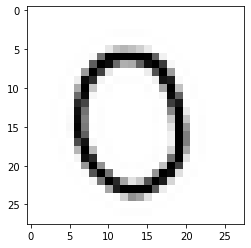

神經網路判斷為: [0]


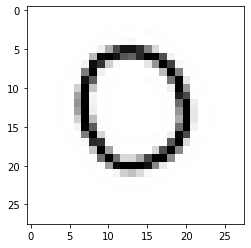

神經網路判斷為: [0]


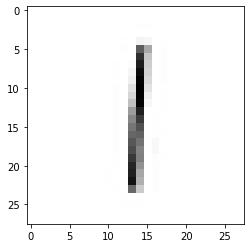

神經網路判斷為: [1]


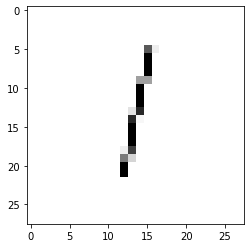

神經網路判斷為: [1]


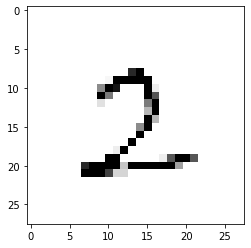

神經網路判斷為: [1]


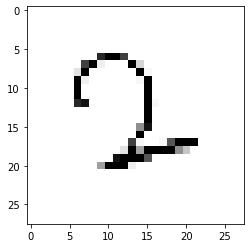

神經網路判斷為: [2]


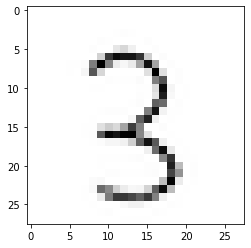

神經網路判斷為: [3]


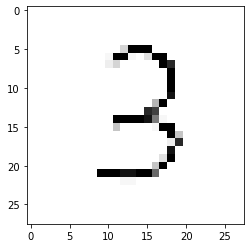

神經網路判斷為: [3]


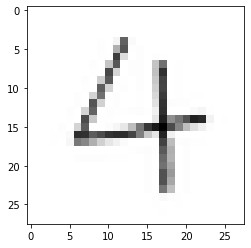

神經網路判斷為: [4]


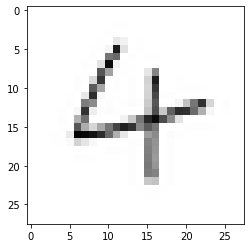

神經網路判斷為: [4]


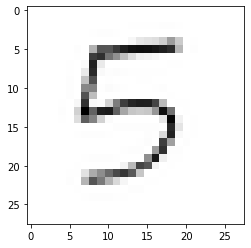

神經網路判斷為: [5]


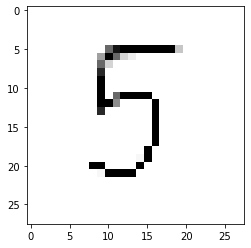

神經網路判斷為: [5]


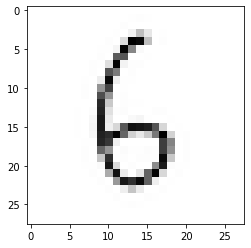

神經網路判斷為: [6]


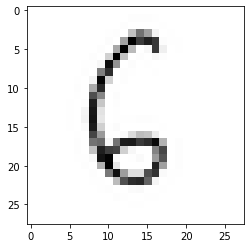

神經網路判斷為: [6]


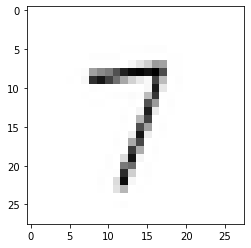

神經網路判斷為: [7]


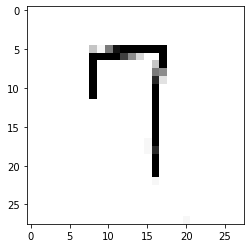

神經網路判斷為: [3]


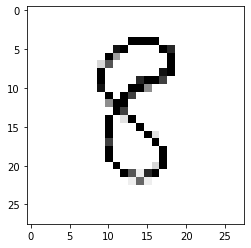

神經網路判斷為: [0]


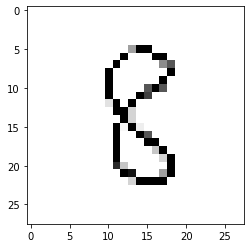

神經網路判斷為: [8]


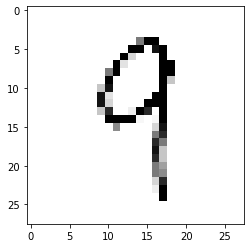

神經網路判斷為: [9]


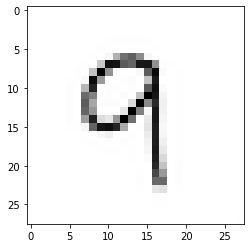

神經網路判斷為: [9]


In [64]:
#17/20
for i in range(20):
    plt.imshow(im_arr[i].reshape(28,28),cmap='Greys')
    plt.show()
    print('神經網路判斷為:',model.predict_classes(im_arr[i]))

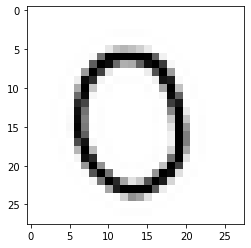

神經網路判斷為: [0]


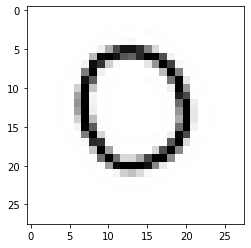

神經網路判斷為: [0]


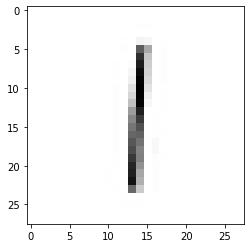

神經網路判斷為: [1]


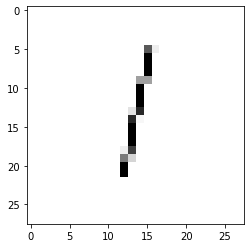

神經網路判斷為: [1]


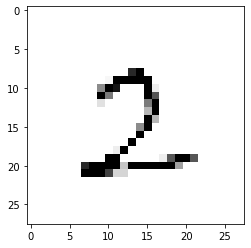

神經網路判斷為: [1]


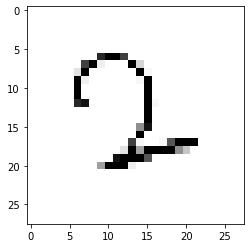

神經網路判斷為: [2]


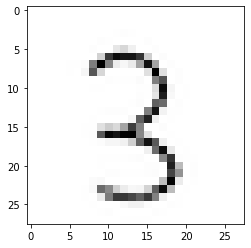

神經網路判斷為: [3]


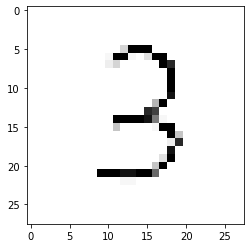

神經網路判斷為: [3]


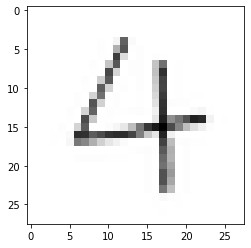

神經網路判斷為: [4]


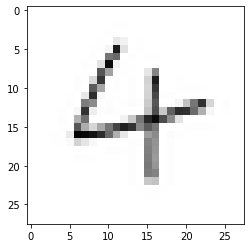

神經網路判斷為: [4]


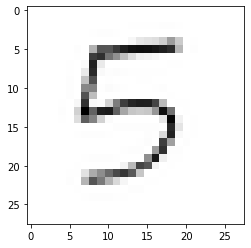

神經網路判斷為: [5]


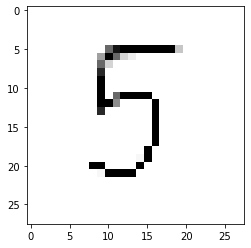

神經網路判斷為: [5]


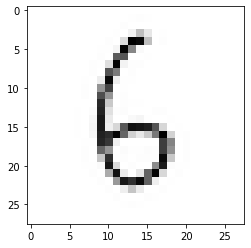

神經網路判斷為: [6]


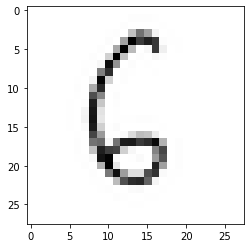

神經網路判斷為: [6]


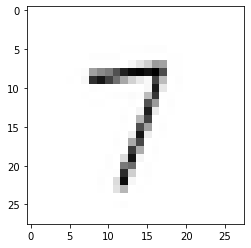

神經網路判斷為: [7]


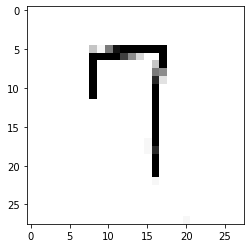

神經網路判斷為: [2]


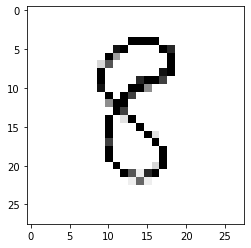

神經網路判斷為: [0]


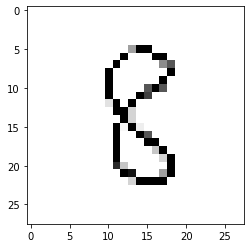

神經網路判斷為: [8]


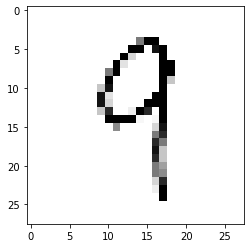

神經網路判斷為: [9]


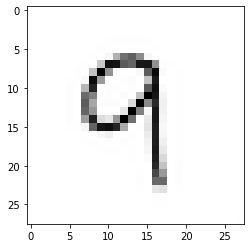

神經網路判斷為: [9]


In [65]:
#17/20
for i in range(20):
    plt.imshow(im_arr[i].reshape(28,28),cmap='Greys')
    plt.show()
    print('神經網路判斷為:',model2.predict_classes(im_arr[i]))

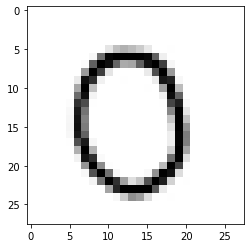

神經網路判斷為: [0]


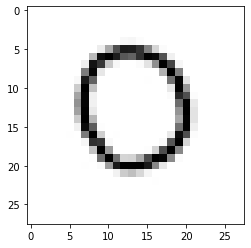

神經網路判斷為: [9]


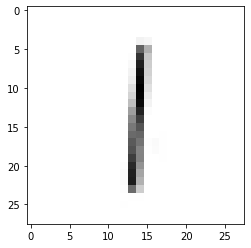

神經網路判斷為: [1]


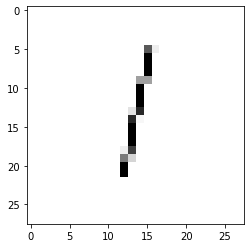

神經網路判斷為: [1]


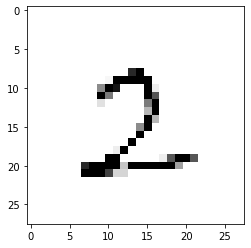

神經網路判斷為: [1]


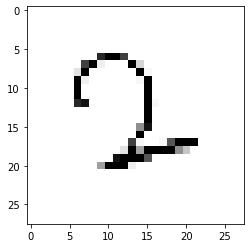

神經網路判斷為: [7]


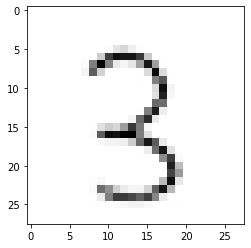

神經網路判斷為: [3]


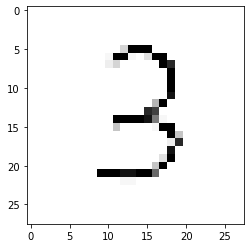

神經網路判斷為: [7]


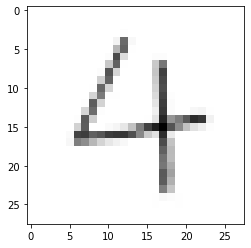

神經網路判斷為: [4]


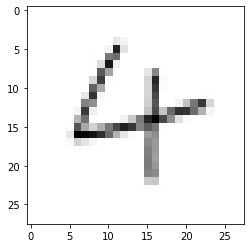

神經網路判斷為: [4]


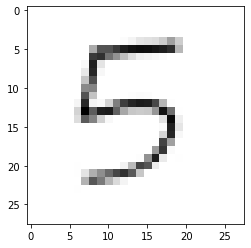

神經網路判斷為: [5]


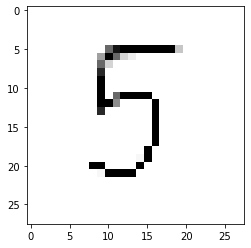

神經網路判斷為: [1]


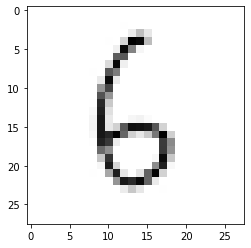

神經網路判斷為: [6]


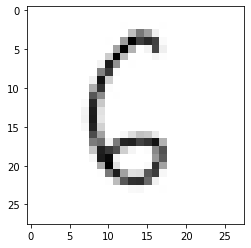

神經網路判斷為: [6]


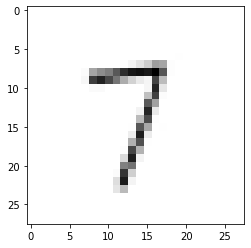

神經網路判斷為: [7]


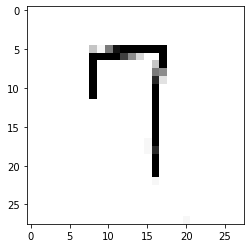

神經網路判斷為: [7]


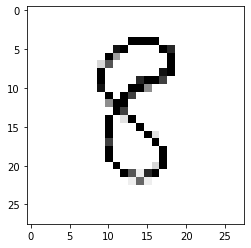

神經網路判斷為: [8]


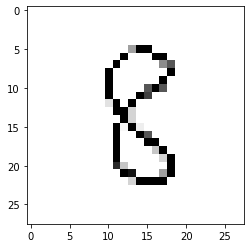

神經網路判斷為: [1]


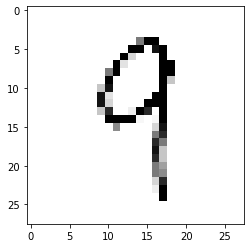

神經網路判斷為: [9]


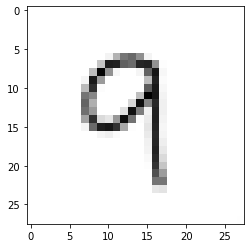

神經網路判斷為: [9]


In [38]:
#14/20
for i in range(20):
    plt.imshow(im_arr[i].reshape(28,28),cmap='Greys')
    plt.show()
    print('神經網路判斷為:',model3.predict_classes(im_arr[i]))

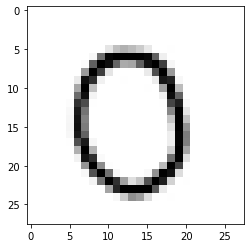

神經網路判斷為: [0]


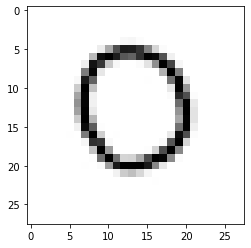

神經網路判斷為: [0]


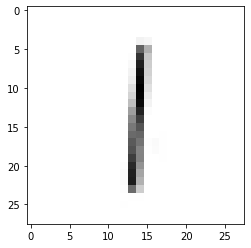

神經網路判斷為: [1]


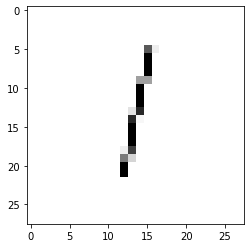

神經網路判斷為: [1]


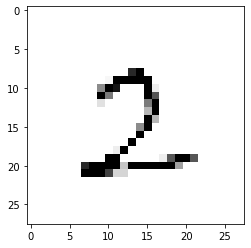

神經網路判斷為: [2]


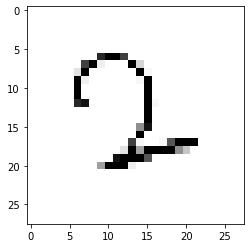

神經網路判斷為: [2]


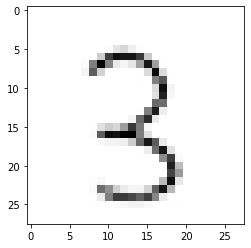

神經網路判斷為: [3]


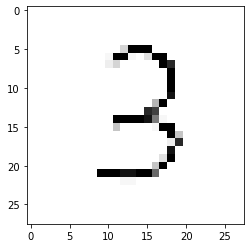

神經網路判斷為: [3]


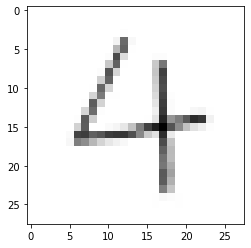

神經網路判斷為: [4]


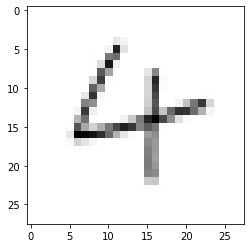

神經網路判斷為: [4]


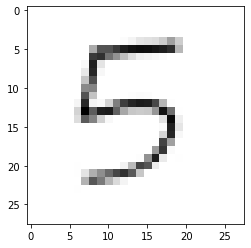

神經網路判斷為: [5]


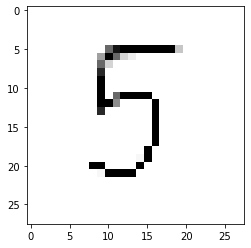

神經網路判斷為: [4]


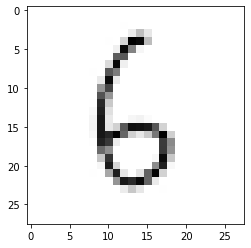

神經網路判斷為: [6]


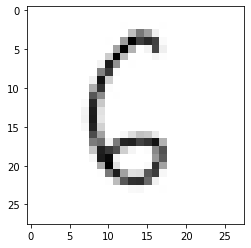

神經網路判斷為: [6]


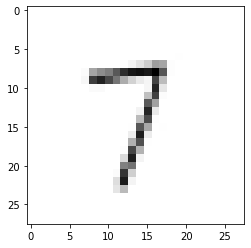

神經網路判斷為: [7]


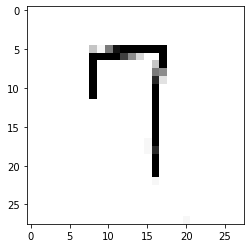

神經網路判斷為: [2]


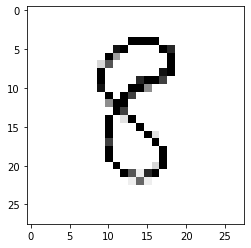

神經網路判斷為: [3]


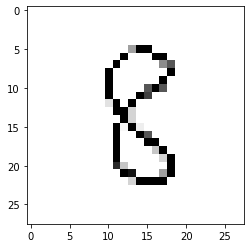

神經網路判斷為: [8]


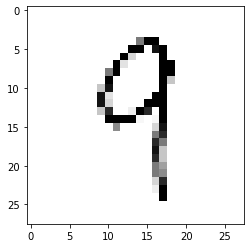

神經網路判斷為: [9]


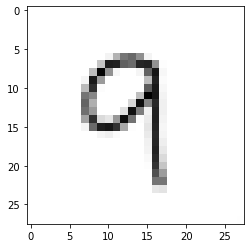

神經網路判斷為: [9]


In [39]:
#17/20
for i in range(20):
    plt.imshow(im_arr[i].reshape(28,28),cmap='Greys')
    plt.show()
    print('神經網路判斷為:',model4.predict_classes(im_arr[i]))

# 將訓練好的神經網路存起來

In [123]:
#model_json = model.to_json()
#open('hand_writing.json', 'w').write(model_json)
#model.save('hand_writing_model.h5')
#model2.save('hand_writing_model2.h5')
model3.save('hand_writing_model3.h5')
model4.save('hand_writing_model4.h5')

In [15]:
from keras.models import load_model

In [17]:
model3 = load_model('hand_writing_model3.h5')
model4 = load_model('hand_writing_model4.h5')

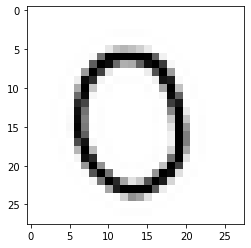

NameError: name 'model_test' is not defined

In [71]:
#19/20
for i in range(20):
    plt.imshow(im_arr[i].reshape(28,28),cmap='Greys')
    plt.show()
    print('神經網路判斷為:',model_test.predict_classes(im_arr[i]))